# Buildmodel

Build nonlinear time series models from scalar time series data using minimum description length radila basis function formalism

## Sample data

First we generate some typical test data to play with

In [1]:
include("ChaosFunctions.jl")

addnoise (generic function with 1 method)

In [2]:
using Plots

In [3]:
z=lorenzpoints(5000,0.05)

3×5001 Array{Float64,2}:
 -9.3954   -9.11588  -8.65294  -8.14648  …   0.348011  -0.90338  -1.72562
 -9.09342  -8.3313   -7.63451  -7.18491     -2.88828   -2.83896  -3.19333
 28.5537   28.7701   28.4925   27.8354      24.9674    21.8964   19.3518

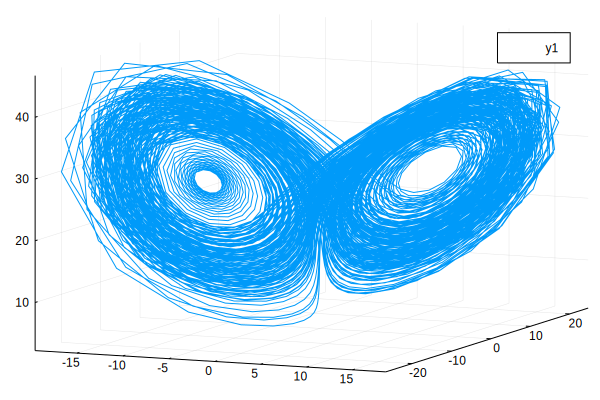

In [4]:
plot(z[1,:],z[2,:],z[3,:])

In [5]:
z=rosslerpoints(5000,0.2)

3×5001 Array{Float64,2}:
 -2.09051    -1.75877    -1.34197   …  -0.459284  -1.49662   -2.20517
 -1.45337    -1.90718    -2.303         3.23109    3.15526    2.90361
  0.0252208   0.0261013   0.027361      3.509      0.936751   0.227118

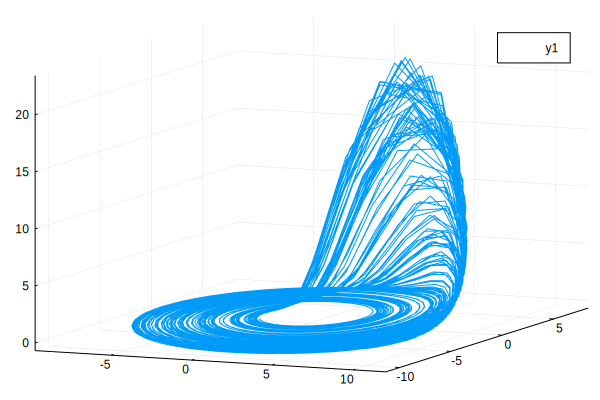

In [6]:
plot(z[1,:],z[2,:],z[3,:])

In [7]:
z=itmap(tinkerbell,-[0.7, 0.6],10000)

2×10000 Array{Float64,2}:
 -0.106024  -0.00524985   0.0848639  …  -0.0789416  -0.43416   -0.148745
 -0.407701  -0.329446    -0.171764      -0.978687   -0.492709  -0.686846

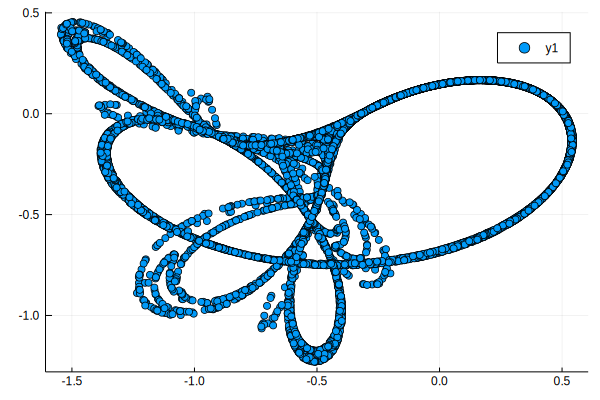

In [8]:
plot(z[2,:],z[1,:],linetype=:dots)

In [9]:
zn=addnoise(z,0.05)

2×10000 Array{Float64,2}:
 -0.13223   -0.024535   0.057758  …  -0.112852  -0.532722  -0.151833
 -0.392635  -0.323745  -0.143537     -0.978662  -0.48934   -0.704206

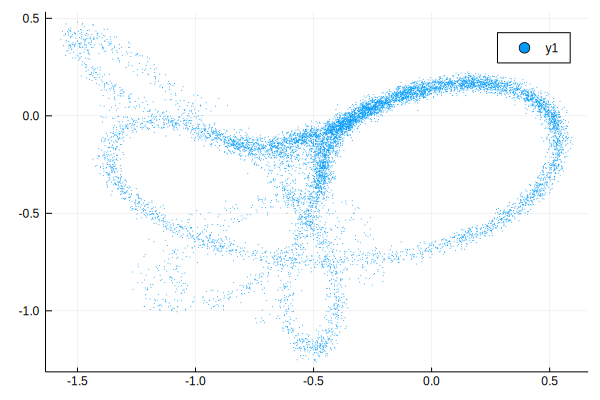

In [10]:
plot(zn[2,:],zn[1,:],linetype=:dots,markersize=0.1)

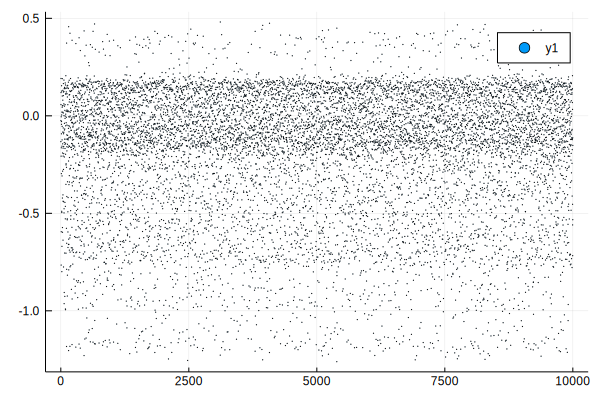

In [11]:
plot(zn[1,:],linetype=:dots,markersize=0.5)

In [225]:
z=itmap(logistic,1/π,10^4);

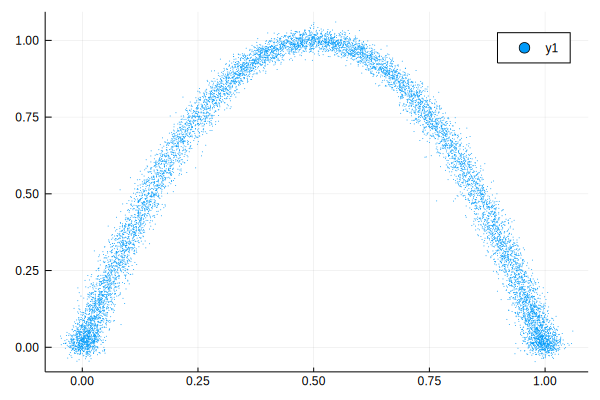

In [396]:
z=itmap(logistic,1/π,10^4);
zn=addnoise(z,0.05)
plot(zn[1:end-1],zn[2:end],linetype=:dots,markersize=0.1)

## Build the model

Import the modelling code, and away we go.

In [419]:
include("BasisFunctionTypes.jl")
include("Place.jl")

Main.Place

Any valid inline function can be used as a penlaty function (it must operate on globally defined functions in `Place.topdown` and must return a scalar, the algorithm seeks a minimum of this function. Four useful examples follow (description length ala `Rissanen` requires extra computation in the main code to account for parameter precisions.

In [139]:
#need to make these variables in scope of the current WS
nx=Int64(length(z))
mss=Float64(Inf)
λ=Array{Float64,1}[]
δ=Array{Float64,1}[]
#valid penalty criteria
Schwarz = :(nx*log(mss)+nk*log(nx))
Akaike = :(nx*log(mss)+2*nk)
Rissanen = :(description(mss,λ,δ,nx)) #Rissanen desciption length
Model30 = :(-nk*(nk<=30))
#nx is # of observation (length of data)
#nk is # of parameters (basis functions in model)
#mss is the mean-sum-square model prediction error
#λ are the model parameters and δ their precisions

:(-nk * (nk <= 30))

Next, the dictionary `options` defined model structure and optional modelling parameters (it'll run a produce something even if `options` is empty, but it might be better to populate this somewhat intelligently. A useful example to model the (admittedly rather simple) logistic map is provided

In [404]:
options=Dict("stopstep"=>10,
    "testdatum"=> 8000,
    "functions"=> (gaussian,tophat),
    "embedding" => ([0,1],[0,1,2]),#([0],[0,1],[0,1,2],[0,1,2,3]),
 #   "embedding" => ([0, 1], [0, 1, 2, 3]),
    "penalty"=> Rissanen,
    "nneighbours"=>1
    )

Dict{String,Any} with 6 entries:
  "penalty"     => :(description(mss, λ, δ, nx))
  "stopstep"    => 10
  "embedding"   => ([0, 1], [0, 1, 2])
  "testdatum"   => 8000
  "functions"   => (gaussian, tophat)
  "nneighbours" => 1

And, then, away we go...

In [420]:
mymodel, X, zout, mdlv = Place.buildmodel(zn,options)

dx=3, nx=7999
needδ=true
*MSS=0.12389473374577378 DL=3006.9136819224923 size=1
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=0.11605127474982782 DL=2753.9082468741663 size=2
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=0.09256821004502669 DL=1850.806460504302 size=2
*MSS=0.0862924310928091 DL=1567.4637438383925 size=3
*MSS=0.07626940805006295 DL=1074.6792062006743 size=3
*MSS=0.07211595039902248 DL=855.8155811152078 size=4
*MSS=0.06887952602725791 DL=678.0829083171824 size=5
*MSS=0.02652137178998912 DL=-3134.9093446529196 size=5
MSS=0.030311111951669127 DL=-2596.674126387413 size=5
*MSS=0.02000807073937638 DL=-4252.338241673154 size=6
*MSS=0.0199197104213829 DL=-4266.399033915223 size=6
*MSS=0.0181204937003568 DL=-4639.044833865317 size=7
*MSS=0.008284178832092324 DL=-7769.488776306735 size=7
*MSS=0.005573202888381284 DL=-9344.223593109993 size=8
*MSS=0.005542636257651175 DL=-9357.756882836053 size=9
*MSS=0.005533385804773984 DL=-9358.1236599468

(Main.Place.PlaceModel(Main.Place.BasisFunc[Main.Place.BasisFunc(tophat, [0, 1], 0.7816349104383122, [0.8020661929457048 0.30504716682772737 … 0.22044955065884966 0.933138429835005; 0.7023529675710953 0.07067041687749853 … 0.9686932524588416 0.3768532351569799], [4.546114281793901]), Main.Place.BasisFunc(tophat, [0, 1], 0.6108937106799757, [0.8020661929457048 0.30504716682772737 … 0.22044955065884966 0.933138429835005; 0.7023529675710953 0.07067041687749853 … 0.9686932524588416 0.3768532351569799], [4.900163818337531]), Main.Place.BasisFunc(tophat, [0, 1], 0.41329956958859454, [0.8020661929457048 0.30504716682772737 … 0.22044955065884966 0.933138429835005; 0.7023529675710953 0.07067041687749853 … 0.9686932524588416 0.3768532351569799], [4.974098407820305]), Main.Place.BasisFunc(tophat, [0, 1], 0.9756642372200436, [0.8020661929457048 0.30504716682772737 … 0.22044955065884966 0.933138429835005; 0.7023529675710953 0.07067041687749853 … 0.9686932524588416 0.3768532351569799], [4.8432298261

Modelling done, we can make one-step predictions on time series data

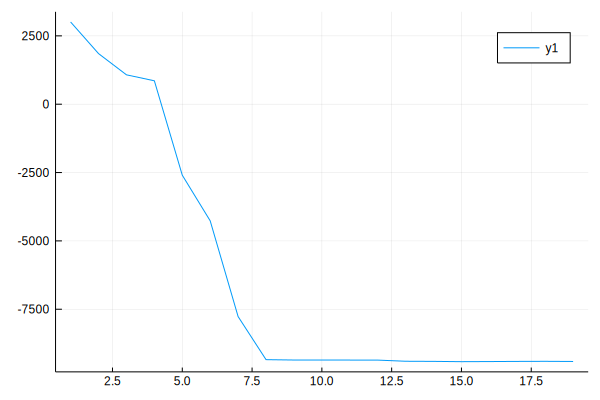

In [421]:
plot(mdlv)

In [422]:
yt,yp,ep = Place.predict(mymodel, z);

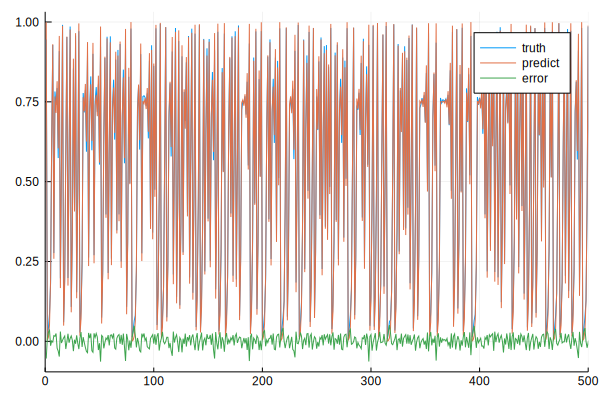

In [423]:
plot(yt,label="truth")
plot!(yp,label="predict")
plot!(ep,label="error",xlimit=(0,500))

Or, free run simulations

In [424]:
yp, yt = Place.freerun(mymodel,zn,500)

([0.9098684563747367, 0.4205880981802479, 0.8935040250034967, 0.44150377738739127, 0.9313293876224819, 0.3002415665860319, 0.8013286758861673, 0.6894408986969481, 0.790484014897854, 0.6890456482997886  …  9.965425358011492e190, -2.5749381134580797e191, 6.65330986881434e191, -1.719129946428631e192, 4.4420113161426823e192, -1.1477587586517438e193, 2.9656614409657596e193, -7.662888839779053e193, 1.979992205438271e194, -5.116045939809491e194], [0.9900984204101096, -0.0136312504764182, -0.01318661092166176, 0.0440295940175308, 0.17131106021836806, 0.5979635353006896, 0.9296265788552356, 0.257343585687074, 0.7401389916670992, 0.7161067177011697  …  0.9914200395051963, 0.14240118139832292, 0.5016567703872686, 1.0023138463415482, 0.014392277455694534, 0.02695350373129985, 0.0174550284213131, 0.12065757634955479, 0.4618685634538607, 0.971371639020417])

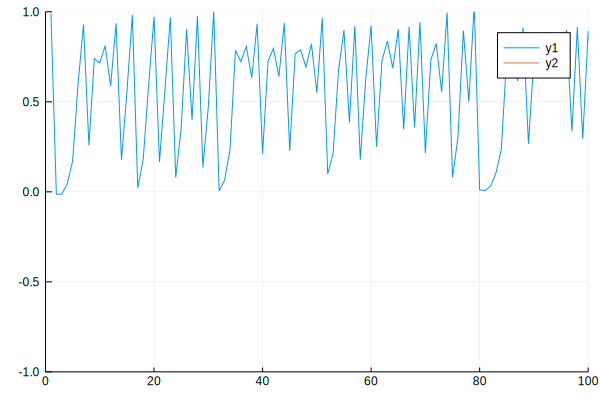

In [426]:
plot(yt)
plot!(yp,ylimit=(-1,1),xlimit=(0,100))


## Michael Small

Last updated 12/7